In [1]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"D:\Data Science\Python\Projects\Project-5 Copper\Copper_Set.xlsx")
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [4]:
#checking null values in the dataframe
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [6]:
#checking unique values
df.nunique() 

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [3]:
df['quantity tons']=pd.to_numeric(df['quantity tons'],errors="coerce")
df['item_date1']=pd.to_datetime(df['item_date'],format="%Y%m%d",errors="coerce").dt.date
df['delivery date1']=pd.to_datetime(df['delivery date'],format="%Y%m%d",errors="coerce").dt.date
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date1,delivery date1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              181671 non-null  object 
 1   item_date       181672 non-null  float64
 2   quantity tons   181672 non-null  float64
 3   customer        181672 non-null  float64
 4   country         181645 non-null  float64
 5   status          181671 non-null  object 
 6   item type       181673 non-null  object 
 7   application     181649 non-null  float64
 8   thickness       181672 non-null  float64
 9   width           181673 non-null  float64
 10  material_ref    103754 non-null  object 
 11  product_ref     181673 non-null  int64  
 12  delivery date   181672 non-null  float64
 13  selling_price   181672 non-null  float64
 14  item_date1      181670 non-null  object 
 15  delivery date1  181670 non-null  object 
dtypes: float64(9), int64(1), object(6)
memory usage: 22.2+ M

In [15]:
df.isnull().sum()

id                    2
item_date             1
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref      77919
product_ref           0
delivery date         1
selling_price         1
item_date1            3
delivery date1        3
dtype: int64

In [19]:
null_mask = df['quantity tons'].isnull()
null_rows = df[null_mask]
null_rows

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date1,delivery date1
173086,3C0A018F-4A85-4D96-A1AA-72BF0F7DC6DD,20200714.0,NaN,30157111.0,78.0,Won,W,41.0,0.5,1000.0,NaN,164141591,20200801.0,672.0,2020-07-14,2020-08-01


In [4]:
df['material_ref']=df['material_ref'].apply(lambda x : np.nan if str(x).startswith("00000") else x)
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date1,delivery date1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,NaN,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,NaN,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,NaN,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,NaN,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [30]:
df.isnull().sum()

id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref      100645
product_ref            0
delivery date          1
selling_price          1
item_date1             3
delivery date1         3
dtype: int64

In [5]:
#drop material reference and id columns
df.drop(columns=["id","material_ref"],inplace=True)
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date1,delivery date1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [7]:
df.isnull().sum()

item_date          1
quantity tons      1
customer           1
country           28
status             2
item type          0
application       24
thickness          1
width              0
product_ref        0
delivery date      1
selling_price      1
item_date1         3
delivery date1     3
dtype: int64

In [8]:
df.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [9]:
df.describe().T      #Transpose

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [6]:
df['quantity tons']=df['quantity tons'].apply(lambda x : np.nan if x<=0 else x)
df['selling_price']=df['selling_price'].apply(lambda x : np.nan if x<=0 else x)
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date1,delivery date1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,NaN,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [13]:
df.nunique()

item_date            252
quantity tons     181668
customer            1169
country               17
status                 9
item type              7
application           30
thickness            594
width               1386
product_ref           33
delivery date         28
selling_price       9789
item_date1           250
delivery date1        26
dtype: int64

In [14]:
df.isnull().sum()

item_date          1
quantity tons      5
customer           1
country           28
status             2
item type          0
application       24
thickness          1
width              0
product_ref        0
delivery date      1
selling_price      8
item_date1         3
delivery date1     3
dtype: int64

In [17]:
df.dtypes

item_date         float64
quantity tons     float64
customer          float64
country           float64
status             object
item type          object
application       float64
thickness         float64
width             float64
product_ref         int64
delivery date     float64
selling_price     float64
item_date1         object
delivery date1     object
dtype: object

In [7]:
#handling null values using mean,median,mode
df['status'].fillna(df['status'].mode().iloc[0],inplace=True)
df['item_date1'].fillna(df['item_date1'].mode().iloc[0],inplace=True)
df['delivery date1'].fillna(df['delivery date1'].mode().iloc[0],inplace=True)
df['item_date'].fillna(df['item_date'].mode().iloc[0],inplace=True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0],inplace=True)
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date1,delivery date1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,NaN,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [22]:
df.isnull().sum()

item_date          0
quantity tons      5
customer           1
country           28
status             0
item type          0
application       24
thickness          1
width              0
product_ref        0
delivery date      0
selling_price      8
item_date1         0
delivery date1     0
dtype: int64

In [8]:
df['quantity tons'].fillna(df['quantity tons'].median(),inplace=True)
df['customer'].fillna(df['customer'].median(),inplace=True)
df['country'].fillna(df['country'].median(),inplace=True)
df['application'].fillna(df['application'].median(),inplace=True)
df['thickness'].fillna(df['thickness'].median(),inplace=True)
df['selling_price'].fillna(df['selling_price'].median(),inplace=True)
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date1,delivery date1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [28]:
df.isnull().sum()

item_date         0
quantity tons     0
customer          0
country           0
status            0
item type         0
application       0
thickness         0
width             0
product_ref       0
delivery date     0
selling_price     0
item_date1        0
delivery date1    0
dtype: int64

In [33]:
df['item_date1'].mode()

0    2020-12-02
Name: item_date1, dtype: object

# Encode the categorical data

In [34]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date1,delivery date1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01


In [35]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [9]:
df['status']=df['status'].map({'Won':1,'Draft':2,'To be approved':3,'Lost':0,'Not lost for AM':4,
                               'Wonderful':5,'Revised':6,'Offered':7,'Offerable':8})

In [37]:
df['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8], dtype=int64)

In [10]:
df['item type']=OrdinalEncoder().fit_transform(df[['item type']]) #2D array needs to be passed as input to ordinal encoder

In [43]:
df['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097007e+01,3.036428e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489812e+01,2.440579e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561375e+01,1.775391e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564824e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


### Handling skewness

In [11]:
def plot(df,column):
    #distplot
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.distplot(df[column])
    plt.title("Distplot for "+column)

    #histogram plot
    plt.subplot(1,3,2)
    sns.histplot(df,x=column,kde=True,bins=30,color="salmon")
    plt.title("Histogram plot for "+column)

    #boxplot
    plt.subplot(1,3,3)
    sns.boxplot(df,x=column)
    plt.title("Box plot for "+column)

In [12]:
skewed_columns=['quantity tons','customer','country','status','item type','application','thickness','width','product_ref','selling_price']

C:\Users\sweth\AppData\Local\Temp\ipykernel_16980\726401276.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\sweth\AppData\Local\Temp\ipykernel_16980\726401276.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\sweth\AppData\Local\Temp\ipykernel_1698

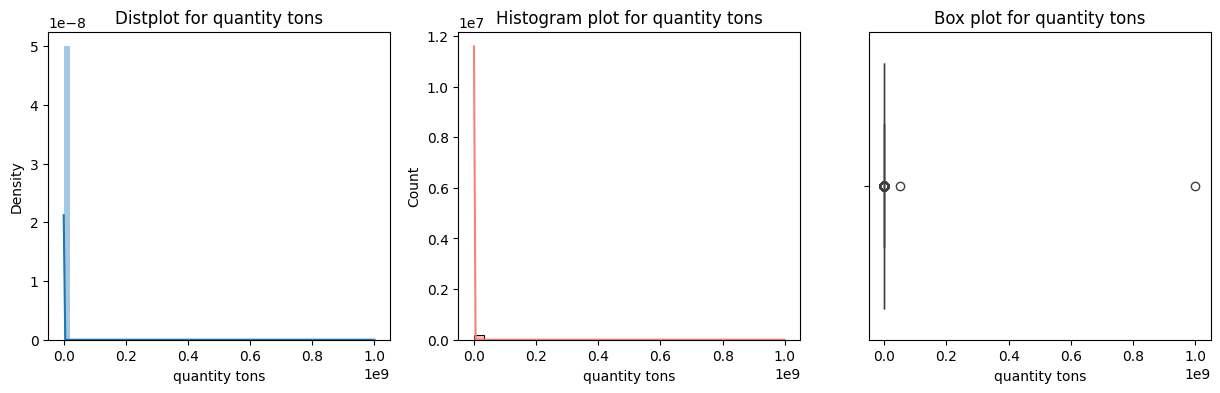

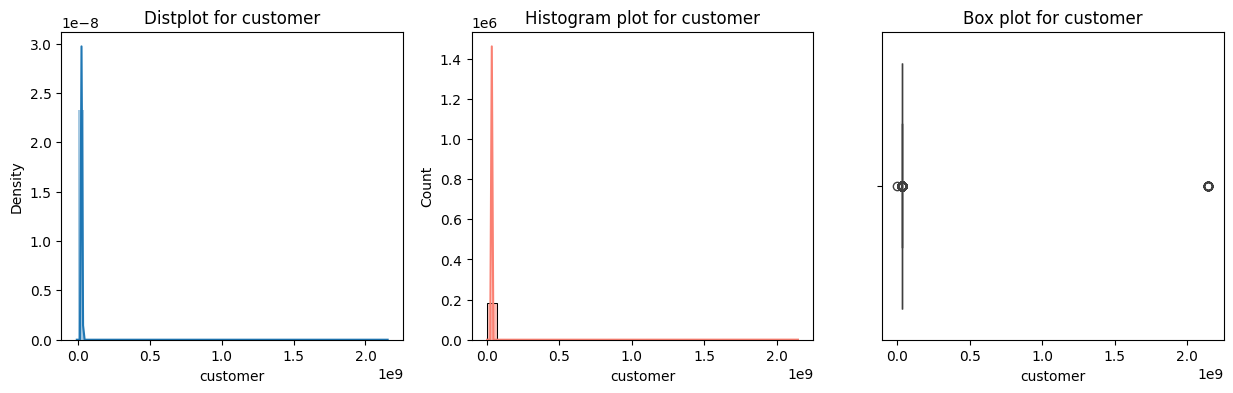

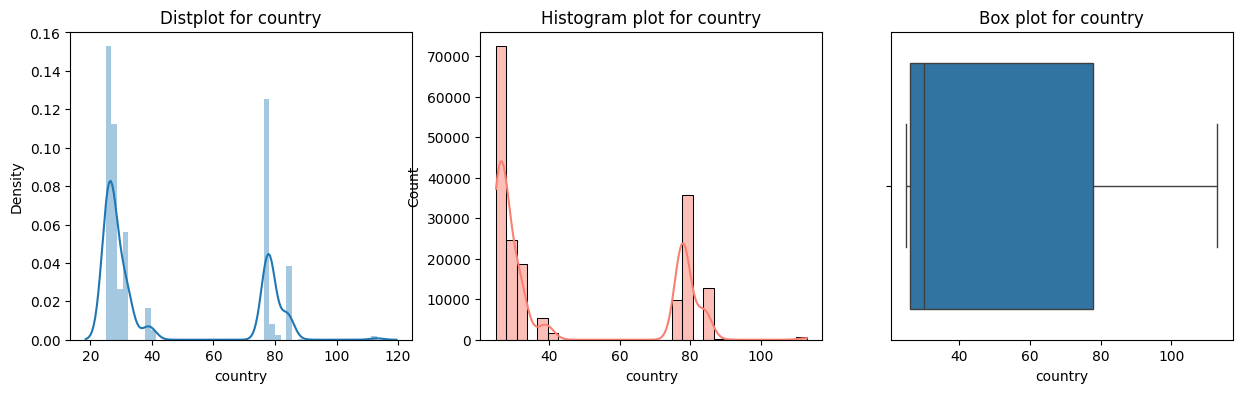

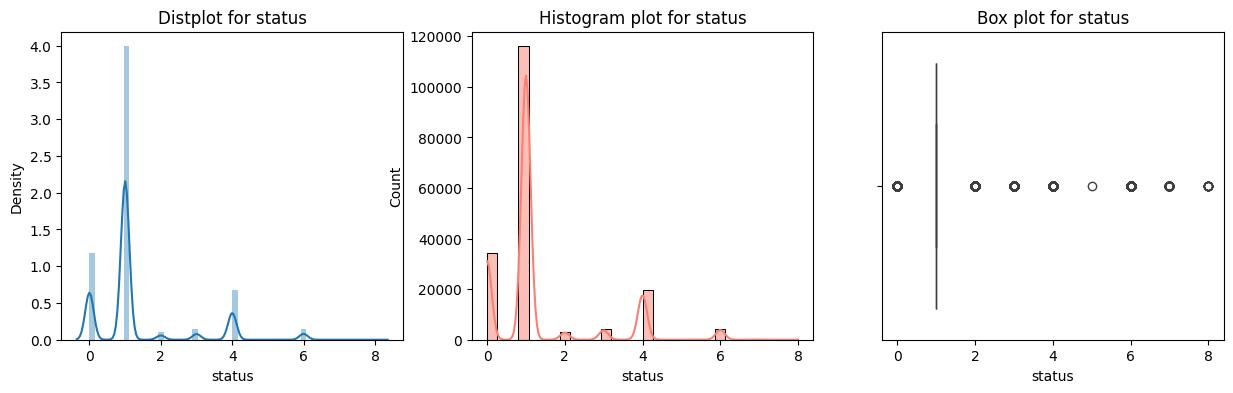

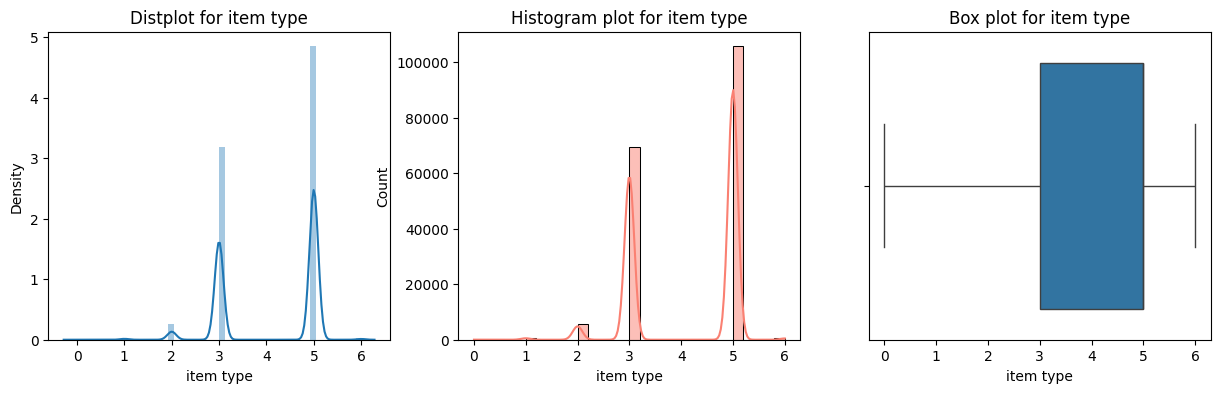

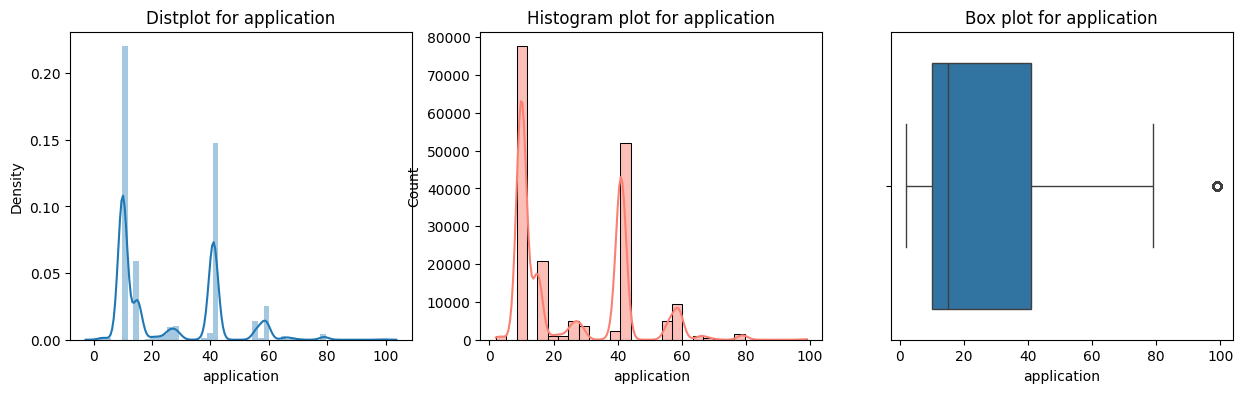

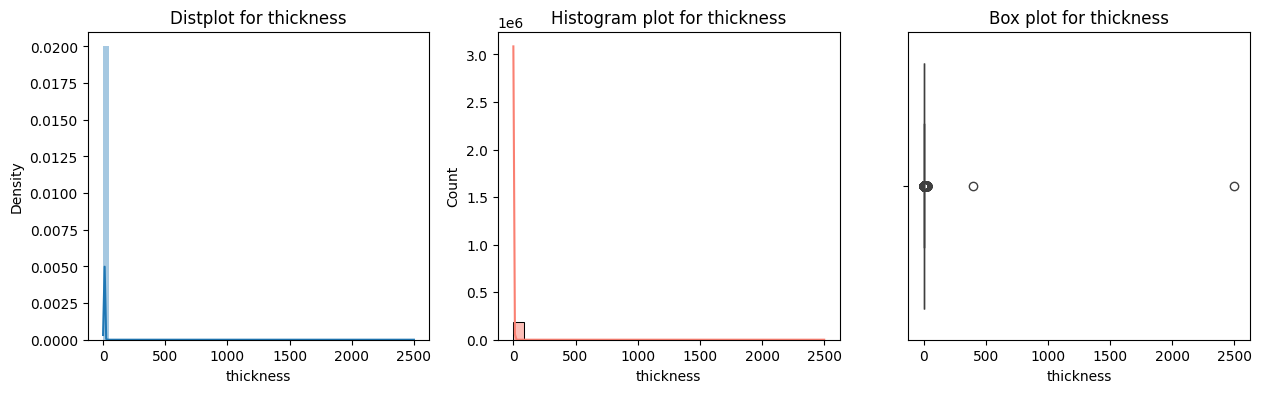

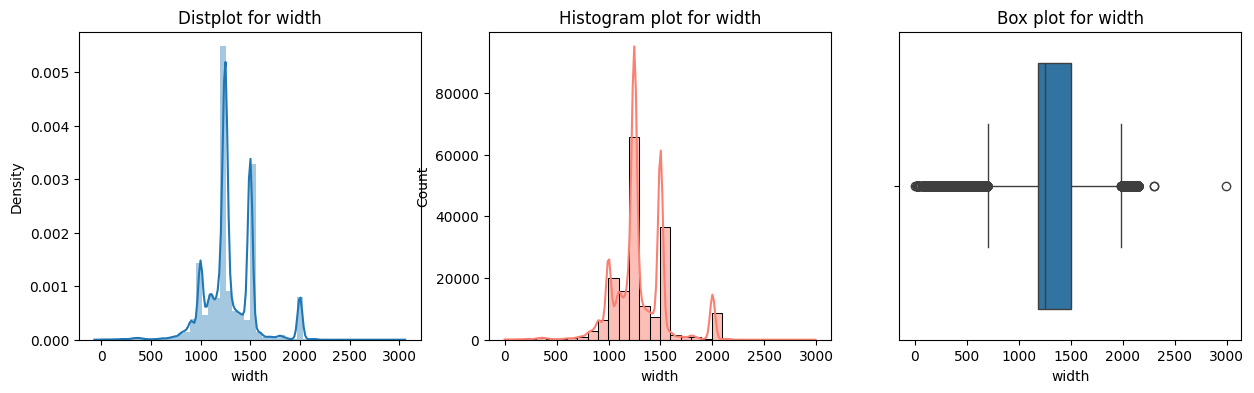

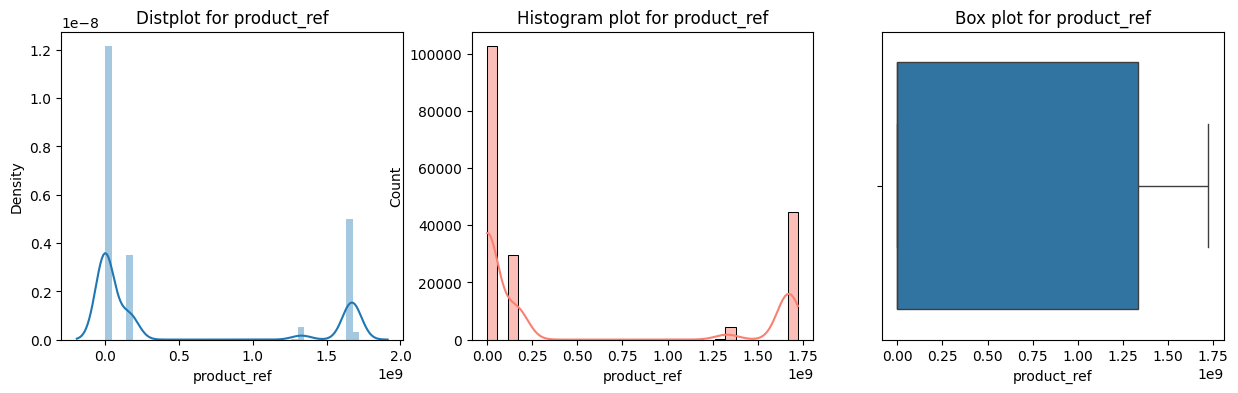

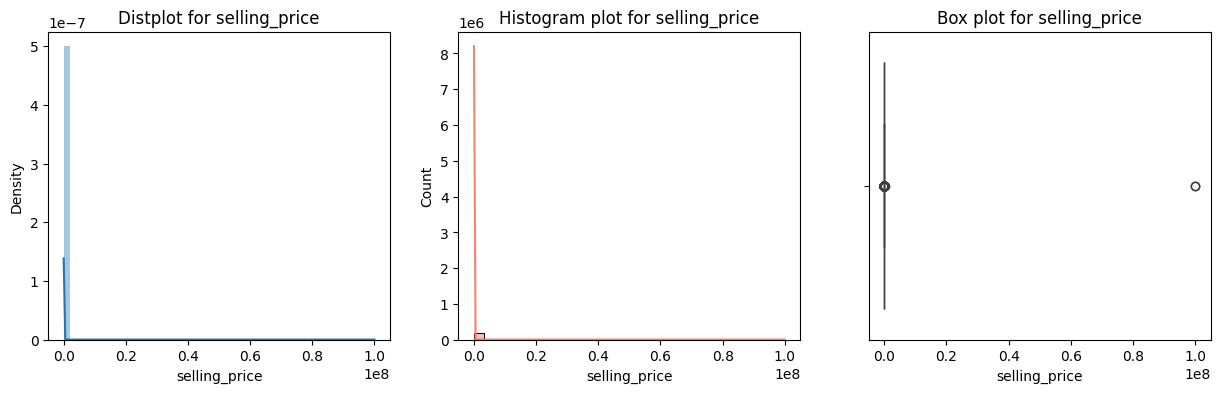

In [13]:
for i in skewed_columns:
    plot(df,i)

In [ ]:
#skewed columns-->quantity tons,customer,thickness,selling price

In [14]:
df1=df.copy()

In [27]:
df1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date1', 'delivery date1'],
      dtype='object')

In [15]:
df1['quantity_tons_log']=np.log(df1['quantity tons'])
df1['customer_log']=np.log(df1['customer'])
df1['thickness_log']=np.log(df1['thickness'])
df1['selling_price_log']=np.log(df1['selling_price'])

C:\Users\sweth\AppData\Local\Temp\ipykernel_16980\726401276.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\sweth\AppData\Local\Temp\ipykernel_16980\726401276.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\sweth\AppData\Local\Temp\ipykernel_1698

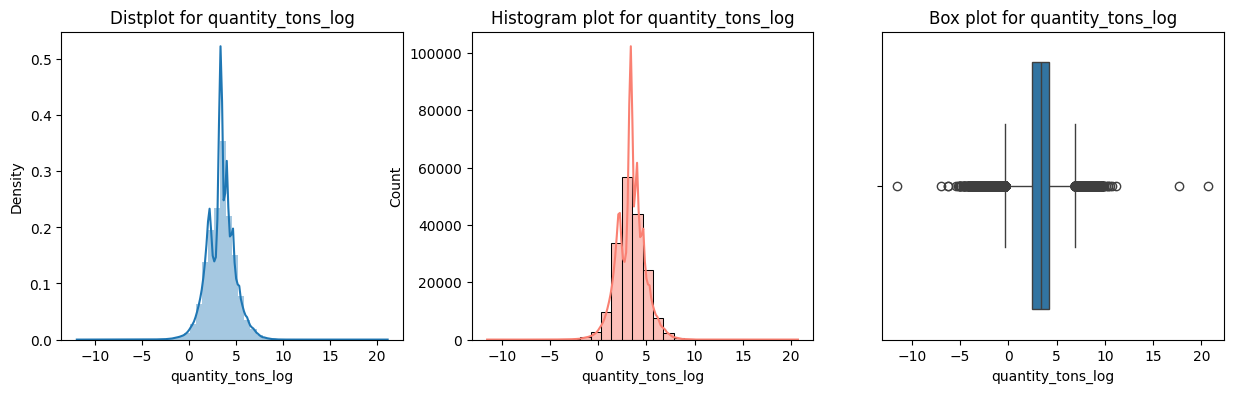

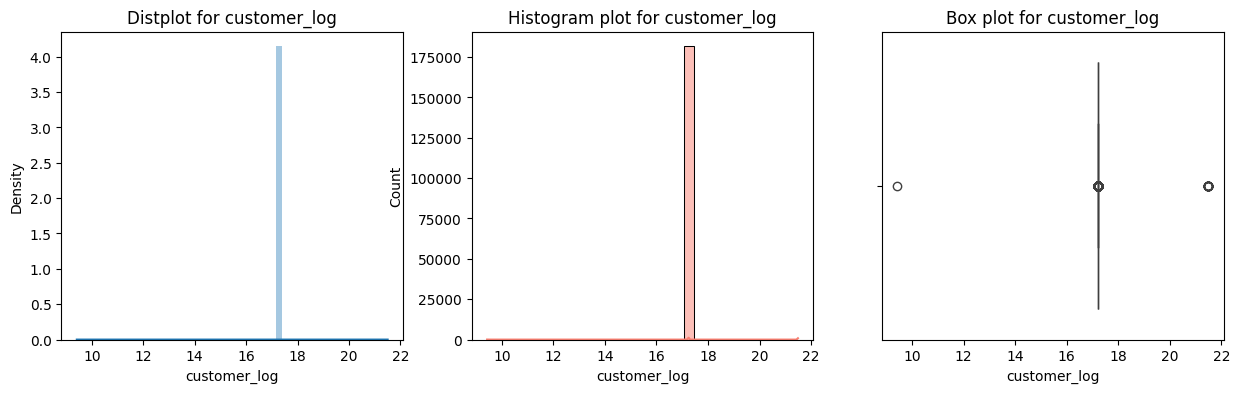

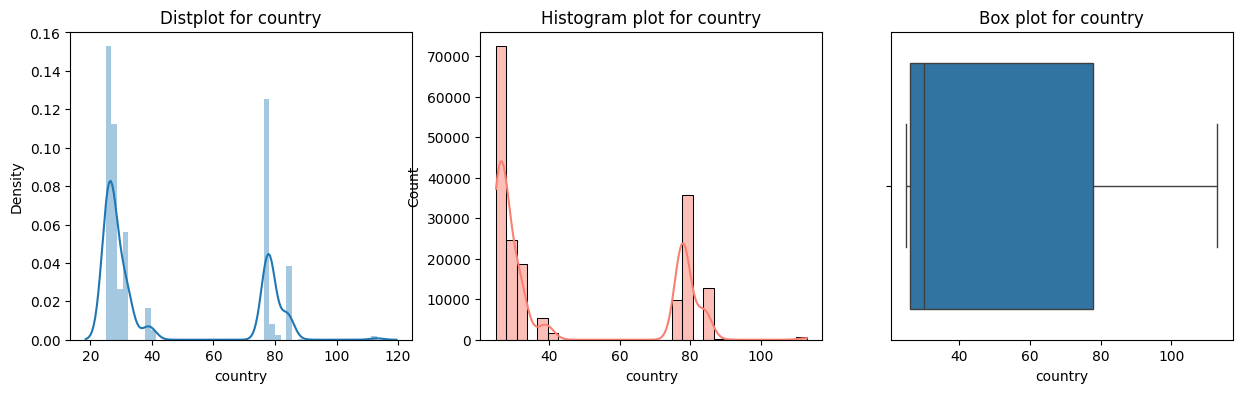

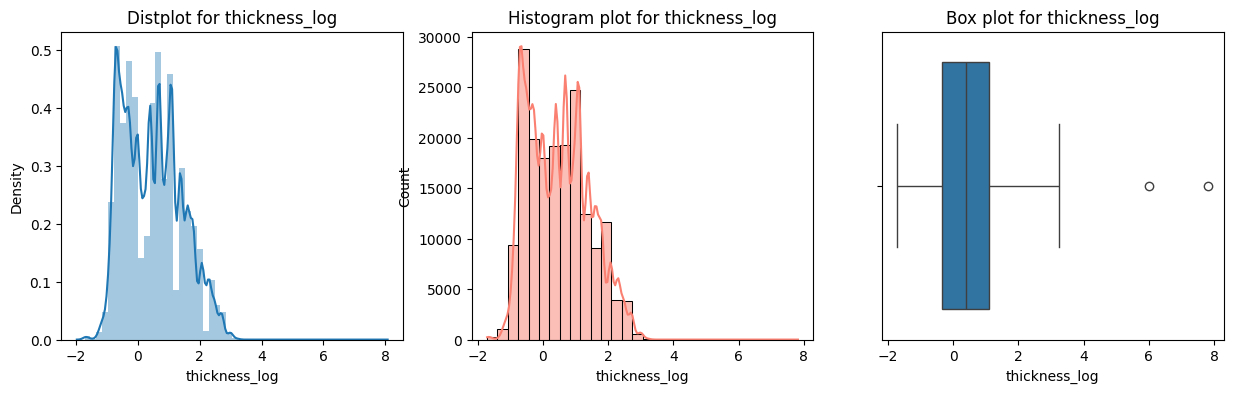

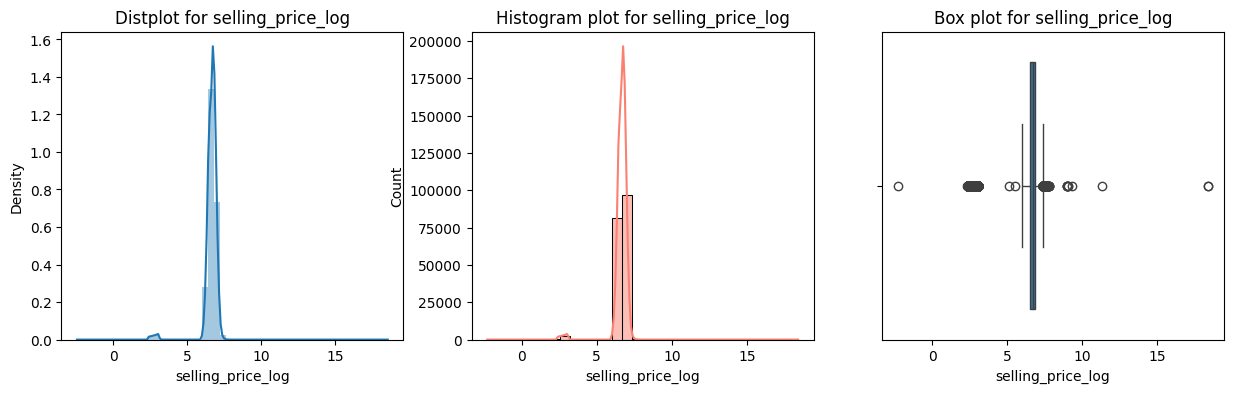

In [16]:
skewed_columns2=['quantity_tons_log','customer_log','country','thickness_log','selling_price_log']
for i in skewed_columns2:
    plot(df1,i)

### Handling outliers

In [17]:
df2=df1.copy()
df2.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date1,delivery date1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [18]:
def outlier(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    upper_threshold=q3+(1.5*iqr)
    lower_threshold=q1-(1.5*iqr)
    df[column]=df[column].clip(lower_threshold,upper_threshold)

In [33]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [34]:
df2.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date1', 'delivery date1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

In [19]:
outlier_columns=['quantity_tons_log','customer_log','thickness_log','selling_price_log','width','application']
for i in outlier_columns:
    outlier(df2,i)

In [38]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.560516e+01,1.771817e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,8.750000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.297046e+03,2.489619e+02,7.000000e+02,1.180000e+03,1.250000e+03,1.500000e+03,1.980000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


C:\Users\sweth\AppData\Local\Temp\ipykernel_16980\726401276.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\sweth\AppData\Local\Temp\ipykernel_16980\726401276.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\sweth\AppData\Local\Temp\ipykernel_1698

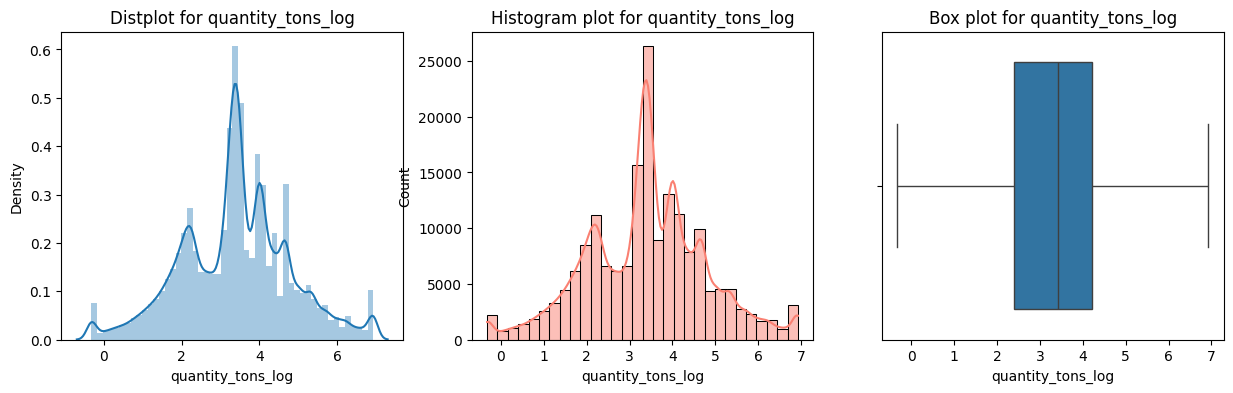

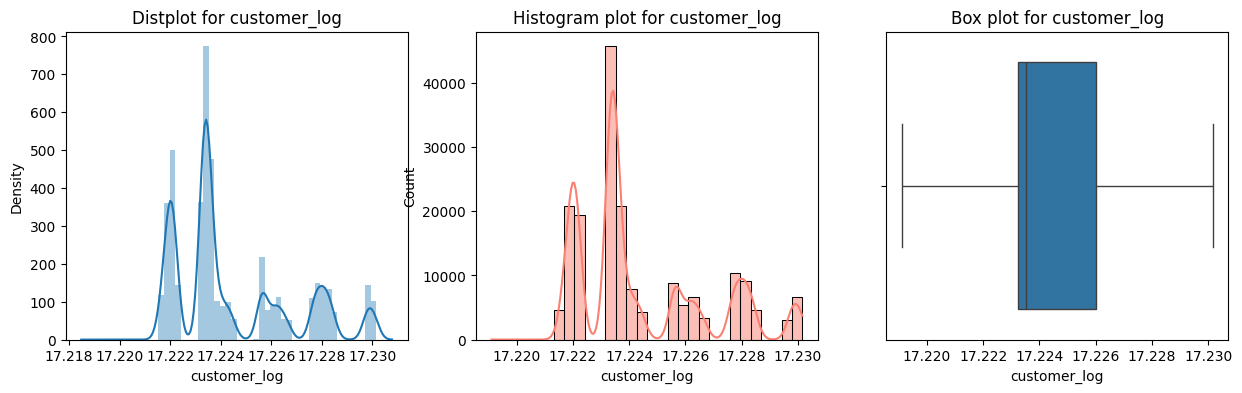

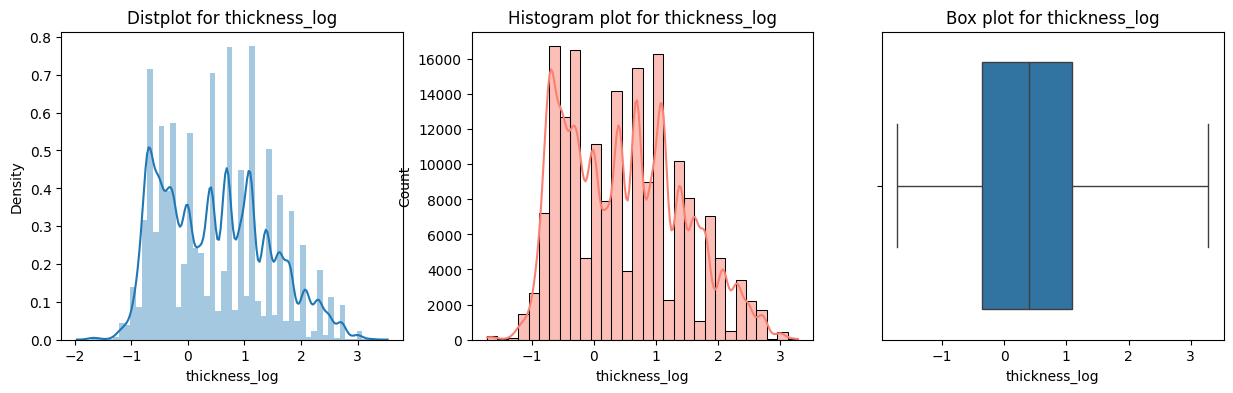

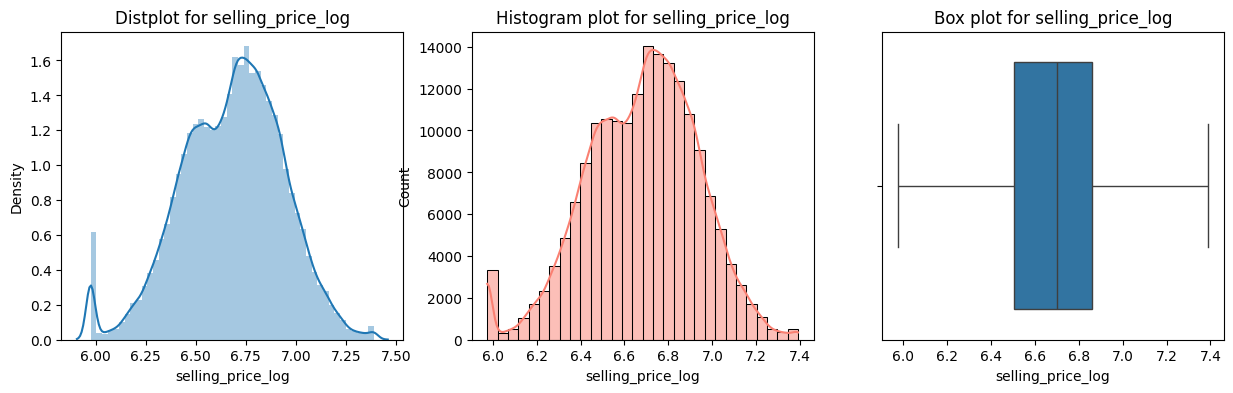

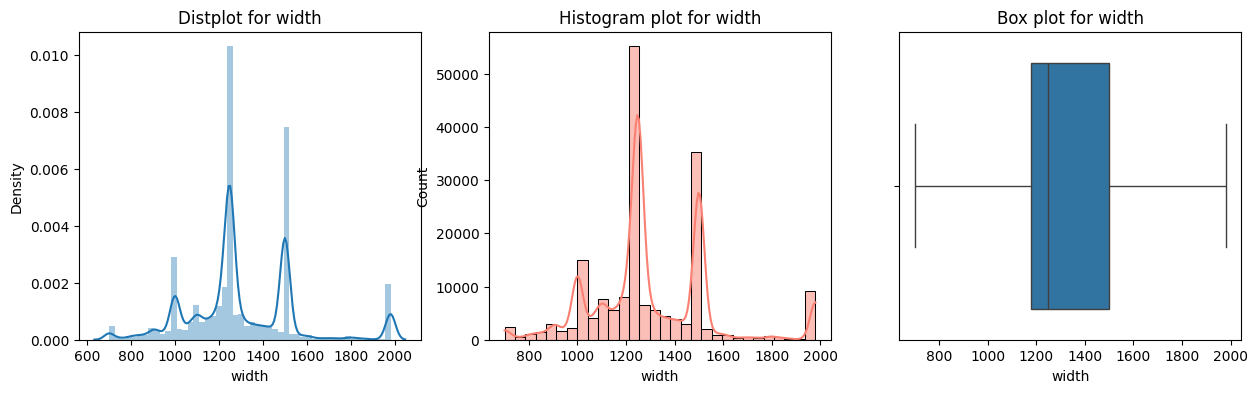

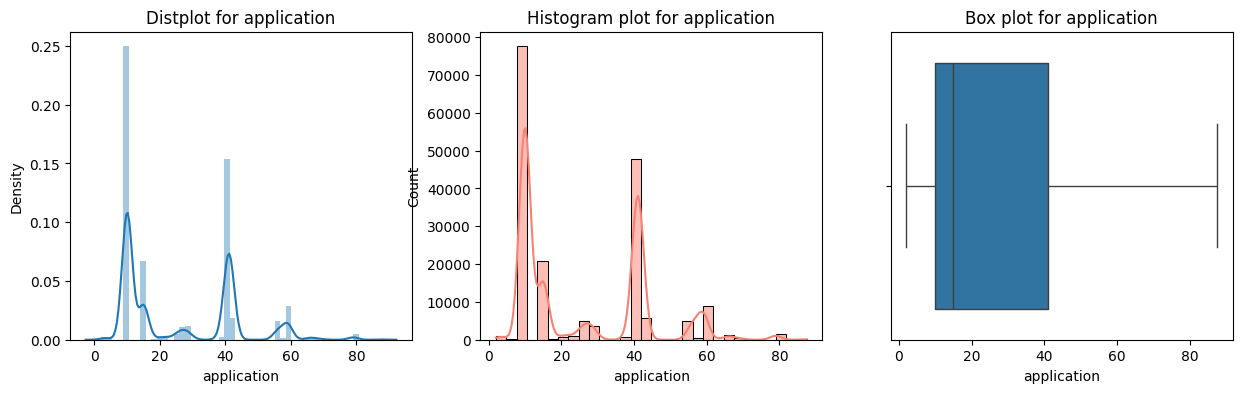

In [20]:
for i in outlier_columns:
    plot(df2,i)

## dropping some columns

In [21]:
df3=df2.drop(columns=["quantity tons","customer","thickness","selling_price"])
df3.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date1,delivery date1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


### Correlation

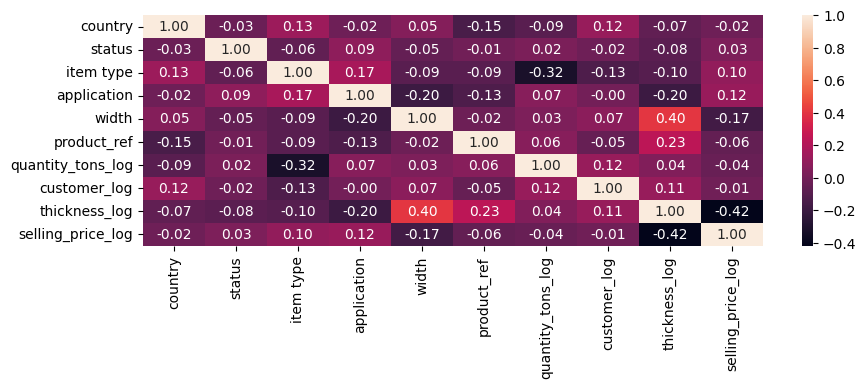

In [22]:
corr=df3.drop(columns=["item_date","delivery date","item_date1","delivery date1"]).corr()
plt.figure(figsize=(10,3))
sns.heatmap(corr,annot=True,fmt="0.2f")
plt.show()

In [ ]:
## high correlations -0.32,0.40,0.23,-0.42,-0.23

### Wrong delivery date using ML prediction

In [23]:
df4=df3.copy()
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date1,delivery date1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [26]:
df4.dtypes

item_date            float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date1            object
delivery date1        object
quantity_tons_log    float64
customer_log         float64
thickness_log        float64
selling_price_log    float64
dtype: object

In [24]:
# converting object to datetime
df4["delivery date1"]=pd.to_datetime(df4["delivery date1"])
df4["item_date1"]=pd.to_datetime(df4["item_date1"])

In [29]:
df4.dtypes

item_date                   float64
country                     float64
status                        int64
item type                   float64
application                 float64
width                       float64
product_ref                   int64
delivery date               float64
item_date1           datetime64[ns]
delivery date1       datetime64[ns]
quantity_tons_log           float64
customer_log                float64
thickness_log               float64
selling_price_log           float64
dtype: object

In [25]:
# difference b/w delivery date & item date
df4["diff_date"]=(df4["delivery date1"]-df4["item_date1"]).dt.days
df4["diff_date"]                 

0         91
1          0
2        -90
3        -90
4        -31
          ..
181668    -1
181669    -1
181670    -1
181671    -1
181672    -1
Name: diff_date, Length: 181673, dtype: int64

In [ ]:
##since the difference is negative, predicting delivery date for few dates

In [26]:
df4["item_date1_day"]=df4["item_date1"].dt.day
df4["item_date1_month"]=df4["item_date1"].dt.month
df4["item_date1_year"]=df4["item_date1"].dt.year
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date1,delivery date1,quantity_tons_log,customer_log,thickness_log,selling_price_log,diff_date,item_date1_day,item_date1_month,item_date1_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90,1,4,2021
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90,1,4,2021
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31,1,4,2021


In [27]:
#separating positive and negative values dataframe
df4_pv=df4[df4['diff_date']>=0]
df4_pv.reset_index(drop=True,inplace=True)
df4_pv.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date1,delivery date1,quantity_tons_log,customer_log,thickness_log,selling_price_log,diff_date,item_date1_day,item_date1_month,item_date1_year
165560,20200702.0,25.0,0,3.0,15.0,1980.0,640665,20200801.0,2020-07-02,2020-08-01,3.472467,17.224270,1.791759,6.313548,30,2,7,2020
165561,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.196171,17.222079,1.348073,6.126869,30,2,7,2020
165562,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.156686,17.222079,1.766442,6.124683,30,2,7,2020
165563,20200702.0,30.0,0,3.0,10.0,1500.0,640665,20200801.0,2020-07-02,2020-08-01,4.025862,17.222079,2.060514,6.126869,30,2,7,2020
165564,20200702.0,30.0,0,3.0,10.0,1830.0,640665,20200801.0,2020-07-02,2020-08-01,5.328963,17.222079,1.348073,6.131226,30,2,7,2020


In [28]:
df4_nv=df4[df4['diff_date']<0]
df4_nv.reset_index(drop=True,inplace=True)
df4_nv.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date1,delivery date1,quantity_tons_log,customer_log,thickness_log,selling_price_log,diff_date,item_date1_day,item_date1_month,item_date1_year
16103,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,-1,2,7,2020
16104,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,-1,2,7,2020
16105,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,-1,2,7,2020
16106,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,-1,2,7,2020
16107,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-07-01,6.008043,17.223381,-0.342490,6.408529,-1,2,7,2020


In [29]:
#selecting best model for delivery date prediction
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
from xgboost import XGBRegressor

In [35]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/99.8 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 0.8/99.8 MB 6.3 MB/s eta 0:00:16
    --------------------------------------- 1.4/99.8 MB 7.9 MB/s eta 0:00:13
    --------------------------------------- 2.0/99.8 MB 9.1 MB/s eta 0:00:11
   - -------------------------------------- 2.8/99.8 MB 10.5 MB/s eta 0:00:10
   - -------------------------------------- 3.7/99.8 MB 11.7 MB/s eta 0:00:09
   - -------------------------------------- 4.8/99.8 MB 13.3 MB/s eta 0:00:08
   -- ------------------------------------- 6.1/99.8 MB 15.1 MB/s eta 0:00:07
   --- ----------------------------


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
df4_pv.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date1', 'delivery date1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'diff_date', 'item_date1_day', 'item_date1_month',
       'item_date1_year'],
      dtype='object')

In [37]:
def accuracy_date(df,models):
    x=df.drop(columns=["item_date1","delivery date1","diff_date"])
    y=df["diff_date"]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    model=models().fit(x_train,y_train)
    y_pred=model.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    print(f"{type(model).__name__}")
    metrics={"R2_score":r2,
             "Mean Square Error":mse,
             "Root mean square error":rmse,
             "Mean Absolute Error":mae
            }
    return metrics

In [38]:
print(accuracy_date(df4_pv,DecisionTreeRegressor))
print(accuracy_date(df4_pv,RandomForestRegressor))
print(accuracy_date(df4_pv,ExtraTreesRegressor))
print(accuracy_date(df4_pv,GradientBoostingRegressor))
print(accuracy_date(df4_pv,AdaBoostRegressor))
print(accuracy_date(df4_pv,XGBRegressor))

DecisionTreeRegressor
{'R2_score': 0.9973101183248695, 'Mean Square Error': 4.160661975659107, 'Root mean square error': 2.0397700791165425, 'Mean Absolute Error': 0.013106634856400809}
RandomForestRegressor
{'R2_score': 0.9973070390427563, 'Mean Square Error': 4.177743408933048, 'Root mean square error': 2.043952888139315, 'Mean Absolute Error': 0.018367710566846867}
ExtraTreesRegressor
{'R2_score': 0.9999390123037437, 'Mean Square Error': 0.09388650379005223, 'Root mean square error': 0.3064090465212348, 'Mean Absolute Error': 0.015907347567420682}
GradientBoostingRegressor
{'R2_score': 0.9886069120932992, 'Mean Square Error': 17.555299069894886, 'Root mean square error': 4.189904422525039, 'Mean Absolute Error': 3.0546286247620538}
AdaBoostRegressor
{'R2_score': 0.7234132384571367, 'Mean Square Error': 428.3763550091146, 'Root mean square error': 20.697254769875027, 'Mean Absolute Error': 17.05026417519638}
XGBRegressor
{'R2_score': 0.9999315812869111, 'Mean Square Error': 0.1040204

In [33]:
def bestmodel(train_df,test_df):
    x=train_df.drop(columns=["item_date1","delivery date1","diff_date"])
    y=train_df["diff_date"]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    model=RandomForestRegressor().fit(x_train,y_train)
    data=test_df.drop(columns=["item_date1","delivery date1","diff_date"])
    y_pred=model.predict(data)
    return y_pred

In [34]:
date_diff=bestmodel(df4_pv,df4_nv)
date_diff

array([17.32, 17.3 ,  0.  , ..., 30.  , 30.  , 30.  ])

In [41]:
#float to int
date_diff1=[]
for i in date_diff:
    dd=int(round(i,0))
    date_diff1.append(dd)
df4_nv["diff_date"]=pd.DataFrame(date_diff1)
df4_nv.tail()

C:\Users\sweth\AppData\Local\Temp\ipykernel_16980\3566425872.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_nv["diff_date"]=pd.DataFrame(date_diff1)


,item_date,country,status,item type,application,width,product_ref,delivery date,item_date1,delivery date1,quantity_tons_log,customer_log,thickness_log,selling_price_log,diff_date,item_date1_day,item_date1_month,item_date1_year
16103,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,30,2,7,2020
16104,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,30,2,7,2020
16105,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,30,2,7,2020
16106,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,30,2,7,2020
16107,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-07-01,6.008043,17.223381,-0.342490,6.408529,30,2,7,2020


In [42]:
df4_nv.isnull().sum()

item_date            0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
delivery date        0
item_date1           0
delivery date1       0
quantity_tons_log    0
customer_log         0
thickness_log        0
selling_price_log    0
diff_date            0
item_date1_day       0
item_date1_month     0
item_date1_year      0
dtype: int64

In [43]:
def del_date(itemdate,diffdate):
    date=itemdate+pd.to_timedelta(diffdate,unit="D")
    return date                                  

In [45]:
df4_nv["delivery date1"]=del_date(df4_nv["item_date1"],df4_nv["diff_date"])

C:\Users\sweth\AppData\Local\Temp\ipykernel_16980\4239689003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_nv["delivery date1"]=del_date(df4_nv["item_date1"],df4_nv["diff_date"])


In [46]:
df_final=pd.concat([df4_pv,df4_nv],axis=0,ignore_index=True)
df_final.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date1,delivery date1,quantity_tons_log,customer_log,thickness_log,selling_price_log,diff_date,item_date1_day,item_date1_month,item_date1_year
181668,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,17.223381,-0.040822,6.381816,30,2,7,2020
181669,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,17.223381,-0.051293,6.378426,30,2,7,2020
181670,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,17.223381,-0.342490,6.428105,30,2,7,2020
181671,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,17.223381,-0.162519,6.398595,30,2,7,2020
181672,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-08-01,6.008043,17.223381,-0.342490,6.408529,30,2,7,2020


In [47]:
df_final["delivery_date_day"]=df_final["delivery date1"].dt.day
df_final["delivery_date_month"]=df_final["delivery date1"].dt.month
df_final["delivery_date_year"]=df_final["delivery date1"].dt.year
df_final.tail(2)

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date1,delivery date1,...,customer_log,thickness_log,selling_price_log,diff_date,item_date1_day,item_date1_month,item_date1_year,delivery_date_day,delivery_date_month,delivery_date_year
181671,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,...,17.223381,-0.162519,6.398595,30,2,7,2020,1,8,2020
181672,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-08-01,...,17.223381,-0.342490,6.408529,30,2,7,2020,1,8,2020


In [48]:
df_final.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date1', 'delivery date1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'diff_date', 'item_date1_day', 'item_date1_month',
       'item_date1_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [50]:
df_final.drop(columns=["item_date","delivery date","item_date1","delivery date1","diff_date"],inplace=True)
df_final.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date1_day', 'item_date1_month',
       'item_date1_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [51]:
df_final.to_csv("Industrial Copper Modeling.csv",index=False)

In [4]:
import pandas as pd
df=pd.read_csv(r"D:\Data Science\Python\Code\Industrial Copper Modeling.csv")
df

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date1_day,item_date1_month,item_date1_year,delivery_date_day,delivery_date_month,delivery_date_year
0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
3,30.0,2,5.0,41.0,1125.0,611993,1.259203,17.223667,-0.967584,5.975038,1,4,2021,1,7,2021
4,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,25.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,1,8,2020
181669,25.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,1,8,2020
181670,25.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,1,8,2020
181671,25.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020


In [53]:
df.isnull().sum()

country                0
status                 0
item type              0
application            0
width                  0
product_ref            0
quantity_tons_log      0
customer_log           0
thickness_log          0
selling_price_log      0
item_date1_day         0
item_date1_month       0
item_date1_year        0
delivery_date_day      0
delivery_date_month    0
delivery_date_year     0
dtype: int64

### Classification Method- Won/Lose

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,roc_curve,auc,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
import pickle
import numpy as np

In [5]:
df_class=df.copy()

In [6]:
df_wl=df_class[(df_class["status"]==1) | (df_class["status"]==0)]
df_wl.tail()

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date1_day,item_date1_month,item_date1_year,delivery_date_day,delivery_date_month,delivery_date_year
181668,25.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,1,8,2020
181669,25.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,1,8,2020
181670,25.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,1,8,2020
181671,25.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020
181672,25.0,1,5.0,41.0,1240.0,164141591,6.008043,17.223381,-0.342490,6.408529,2,7,2020,1,8,2020


In [7]:
df_wl["status"].value_counts() #imbalanced data

status
1    116012
0     34438
Name: count, dtype: int64

In [8]:
x=df_wl.drop(columns=["status"],axis=1)
y=df_wl["status"]

In [9]:
x_new,y_new=SMOTETomek().fit_resample(x,y) #perform resampling

In [10]:
y_new.value_counts()

status
1    115051
0    115051
Name: count, dtype: int64

In [11]:
# to find best model
def best_model(x,y,models):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    model=models().fit(x_train,y_train)
    train_pred=model.predict(x_train)
    test_pred=model.predict(x_test)
    train_accuracy=accuracy_score(y_train,train_pred)
    test_accuracy=accuracy_score(y_test,test_pred)
    metrics={"Model": models.__name__,
             "Train_accuracy": train_accuracy,
             "Test_accuracy": test_accuracy}
    return metrics

In [12]:
print(best_model(x,y,DecisionTreeClassifier))
print(best_model(x,y,RandomForestClassifier))
print(best_model(x,y,ExtraTreesClassifier))
print(best_model(x,y,AdaBoostClassifier))
print(best_model(x,y,GradientBoostingClassifier))
print(best_model(x,y,XGBClassifier))

{'Model': 'DecisionTreeClassifier', 'Train_accuracy': 1.0, 'Test_accuracy': 0.9516782984380193}
{'Model': 'RandomForestClassifier', 'Train_accuracy': 1.0, 'Test_accuracy': 0.9690927218344965}
{'Model': 'ExtraTreesClassifier', 'Train_accuracy': 1.0, 'Test_accuracy': 0.9740112994350283}


C:\Users\sweth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'Model': 'AdaBoostClassifier', 'Train_accuracy': 0.8110667996011964, 'Test_accuracy': 0.8107344632768362}
{'Model': 'GradientBoostingClassifier', 'Train_accuracy': 0.8349119308740446, 'Test_accuracy': 0.8351944167497507}
{'Model': 'XGBClassifier', 'Train_accuracy': 0.9456297773346627, 'Test_accuracy': 0.9321036889332004}


In [13]:
print(best_model(x_new,y_new,DecisionTreeClassifier))
print(best_model(x_new,y_new,RandomForestClassifier))
print(best_model(x_new,y_new,ExtraTreesClassifier))
print(best_model(x_new,y_new,AdaBoostClassifier))
print(best_model(x_new,y_new,GradientBoostingClassifier))
print(best_model(x_new,y_new,XGBClassifier))

{'Model': 'DecisionTreeClassifier', 'Train_accuracy': 1.0, 'Test_accuracy': 0.9641685317572413}
{'Model': 'RandomForestClassifier', 'Train_accuracy': 0.9999945676088243, 'Test_accuracy': 0.9809217531127095}
{'Model': 'ExtraTreesClassifier', 'Train_accuracy': 1.0, 'Test_accuracy': 0.9847026357532431}


C:\Users\sweth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'Model': 'AdaBoostClassifier', 'Train_accuracy': 0.7751587616321076, 'Test_accuracy': 0.7757762760478912}
{'Model': 'GradientBoostingClassifier', 'Train_accuracy': 0.8171457130285038, 'Test_accuracy': 0.8157797527215837}
{'Model': 'XGBClassifier', 'Train_accuracy': 0.954775343462932, 'Test_accuracy': 0.9472197475065731}


In [ ]:
### Selecting RandomForestClassifier and tuning the hyperparameter using GridSearchCV

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.2)
params={"max_depth":[5,10],
        "min_samples_split":[2,5],
        "min_samples_leaf":[1,2],
        "max_features":['sqrt','log2',None]}
gridsearch=GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,cv=3,n_jobs=-1)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [20]:
gridsearch.cv_results_

{'mean_fit_time': array([ 96.45802697,  96.20068804,  95.547544  ,  88.54321798,
        110.62238439, 114.11995165, 112.99801596, 111.61698246,
        434.98031362, 433.82384284, 430.15546743, 429.27721389,
        132.80194394, 127.61288818, 133.99325037, 135.62892111,
        180.85414203, 175.06586893, 176.9776698 , 178.22667011,
        792.92622733, 798.51875838, 791.29780054, 790.11566718]),
 'std_fit_time': array([ 5.61072184,  2.57196796,  1.86893286, 10.88553995,  2.13613333,
         0.87374079,  1.65410264,  1.30713029,  1.52945785,  1.33826394,
         1.0733683 ,  2.92534387,  5.51509538,  0.3329612 ,  3.50261806,
         4.60589128,  2.60351449,  5.02794704,  2.53148879,  3.4324182 ,
         1.89313802,  1.04045189,  3.49966479,  0.10972584]),
 'mean_score_time': array([3.35268776, 3.5866162 , 3.19563842, 2.38739562, 3.6049486 ,
        3.210519  , 2.38273184, 2.30553627, 3.5161202 , 1.90967568,
        2.67157181, 2.50952514, 2.58258287, 3.77551333, 6.79845874,
    

In [21]:
gridsearch.best_score_

0.8807437200595651

In [22]:
gridsearch.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [14]:
x_train, x_test, y_train, y_test= train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

model= RandomForestClassifier(max_depth=10, max_features= 'sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train,y_train)

y_pred_train= model.predict(x_train)
y_pred_test= model.predict(x_test)

accuracy_train= accuracy_score(y_train, y_pred_train)
accuracy_test= accuracy_score(y_test, y_pred_test)

print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)

Accuracy_Train:  0.8835241008034507
Accuracy_Test:  0.8804024249799005


In [15]:
print("Confusion_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))

Confusion_matrix for Test
--------------------------
[[21406  1721]
 [ 3783 19111]]


In [16]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold= roc_curve(y_true= y_test, y_score=y_pred_test)
print(threshold)
print(FP)
print(TP)
print(" ")
auc_curve= auc(x=FP,y=TP)
print("auc_curve:",auc_curve)

[inf  1.  0.]
[0.         0.07441519 1.        ]
[0.        0.8347602 1.       ]
 
auc_curve: 0.8801725067325781


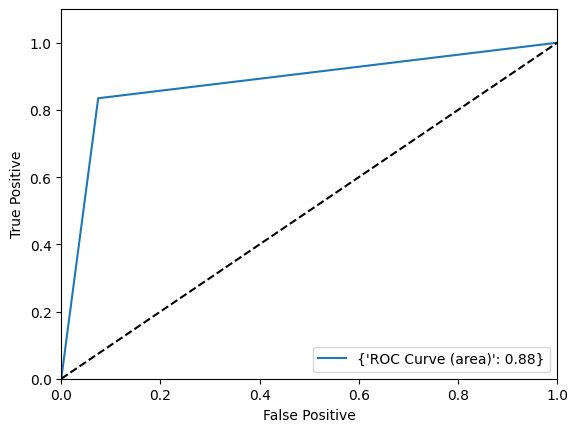

In [18]:
# create a plot for roc and auc 
import matplotlib.pyplot as plt
roc_point= {"ROC Curve (area)":round(auc_curve,2)}
plt.plot(FP,TP,label= roc_point)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()

In [24]:
user_data = np.array([[77.0,3.0,10.0,1500.0,164141591,3.677655,17.222226,0.000000,7.110696,1,4,2021,1,8,2021]])
y_pred_user= model.predict(user_data)

if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Lose


C:\Users\sweth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_pred_user= model.predict(user_data)
if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Won


C:\Users\sweth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [28]:
with open("Classification_model.pkl","wb") as f:
    pickle.dump(model,f)

In [29]:
with open("D:\Data Science\Python\Code\Classification_model.pkl","rb") as f1:
    model= pickle.load(f1)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\sweth\AppData\Local\Temp\ipykernel_19708\2771129231.py:1: SyntaxWarning: invalid escape sequence '\D'
  with open("D:\Data Science\Python\Code\Classification_model.pkl","rb") as f1:


### Regression Model

In [30]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [31]:
df_reg= df.copy()

In [32]:
# to find best model
def accuracy_regressor(df,models):

  x= df.drop(columns=["selling_price_log"], axis=1)
  y= df["selling_price_log"]

  #train test splitting
  x_train,x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= models().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  r2_train= r2_score(y_train, y_pred_train)
  r2_test= r2_score(y_test, y_pred_test)

  metrics={"Model":models.__name__,
           "R2_Train": r2_train,
           "R2_Test": r2_test}

  return metrics

In [34]:
print(accuracy_regressor(df_reg, DecisionTreeRegressor))
print(accuracy_regressor(df_reg, RandomForestRegressor))
print(accuracy_regressor(df_reg, ExtraTreesRegressor))
print(accuracy_regressor(df_reg, AdaBoostRegressor))
print(accuracy_regressor(df_reg, GradientBoostingRegressor))
print(accuracy_regressor(df_reg, XGBRegressor))     

{'Model': 'DecisionTreeRegressor', 'R2_Train': 0.9999206991163908, 'R2_Test': 0.9251177427252306}
{'Model': 'RandomForestRegressor', 'R2_Train': 0.9940579065216223, 'R2_Test': 0.9574920347556747}
{'Model': 'ExtraTreesRegressor', 'R2_Train': 0.9999206991163908, 'R2_Test': 0.9545458239626798}
{'Model': 'AdaBoostRegressor', 'R2_Train': 0.6456659837896224, 'R2_Test': 0.6446929960731367}
{'Model': 'GradientBoostingRegressor', 'R2_Train': 0.8871834346250091, 'R2_Test': 0.8875397239626168}
{'Model': 'XGBRegressor', 'R2_Train': 0.9518444531712226, 'R2_Test': 0.9461680595829992}


In [36]:
x= df_reg.drop(columns=["selling_price_log"], axis=1)
y= df_reg["selling_price_log"]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

parameters_r= {"max_depth": [4,10],
               "min_samples_split": [2,5],
               "min_samples_leaf": [1,2],
               "max_features": ["sqrt","log2",None]}

gridsearch_r= GridSearchCV(estimator= RandomForestRegressor(), param_grid= parameters_r, cv= 3,n_jobs=-1)
gridsearch_r.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [37]:
gridsearch_r.cv_results_

{'mean_fit_time': array([ 22.4611787 ,  22.59086561,  28.05944506,  29.92695522,
         44.91550167,  46.24913987,  46.88397082,  44.9354767 ,
        133.03305991, 123.64140415, 123.08887235, 120.17146349,
         17.1815354 ,  18.81822522,  18.72613478,  18.87056581,
         21.24897019,  21.7404662 ,  20.92389043,  20.63226167,
         95.51305668,  94.87021343,  93.47295682,  93.73862298]),
 'std_fit_time': array([6.65379328, 6.89650276, 2.41100139, 2.05479889, 0.91463024,
        1.23934838, 1.00084052, 1.0196952 , 3.84943343, 1.22475012,
        0.68567538, 1.26842233, 1.2752501 , 0.73724934, 1.42374626,
        0.33920353, 0.32223476, 0.58388836, 0.54256355, 0.39809122,
        1.74424547, 0.99081155, 1.46104871, 0.37123686]),
 'mean_score_time': array([2.27596235, 2.61207008, 2.10109655, 2.42147764, 2.43241421,
        2.35142978, 2.30745546, 2.57875474, 0.2636284 , 0.40613246,
        0.38323855, 0.46472454, 0.93226512, 1.13240226, 1.09657876,
        1.04236952, 1.212460

In [38]:
gridsearch_r.best_score_

0.8990931233577036

In [39]:
gridsearch_r.best_params_

{'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [40]:
x = df_reg.drop(columns=['selling_price_log'], axis=1)
y = df_reg['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model_r.predict(x_train)
y_pred_test = model_r.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test     

(0.9057746013129209, 0.9007038091559066)

In [41]:
x = df_reg.drop(columns=['selling_price_log'], axis=1)
y = df_reg['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model_r.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9563992217664681,
 'Mean Absolute Error': 0.03246598948645144,
 'Mean Squared Error': 0.00287081013251097,
 'Root Mean Squared Error': 0.053579941512761756}

In [42]:
user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model_r.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))


Predicted selling price with Log:  7.1300985830126375
Predicted selling price without Log:  1249.000091035941


C:\Users\sweth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [45]:
user_data = np.array([[28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,1,4,2021,1,7,2021]])
y_pred = regg_model.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))
     

Predicted selling price with Log:  6.887051776258059
Predicted selling price without Log:  979.5093433711203


C:\Users\sweth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [43]:
import pickle
with open("Regression_Model.pkl","wb") as r:
  pickle.dump(model_r,r)     

In [44]:
with open("Regression_Model.pkl","rb") as r1:
  regg_model=pickle.load(r1)     